<a href="https://colab.research.google.com/github/junduk123/Machine-Learning-Task/blob/main/Task9/Classification_model_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Proses Dataset 1
Metrik Evaluasi untuk Dataset 1:
Accuracy: 0.8
Precision: 0.7929720232463847
Recall: 0.8
F1 Score: 0.7941653982749872
AUC: 0.7934847938454141


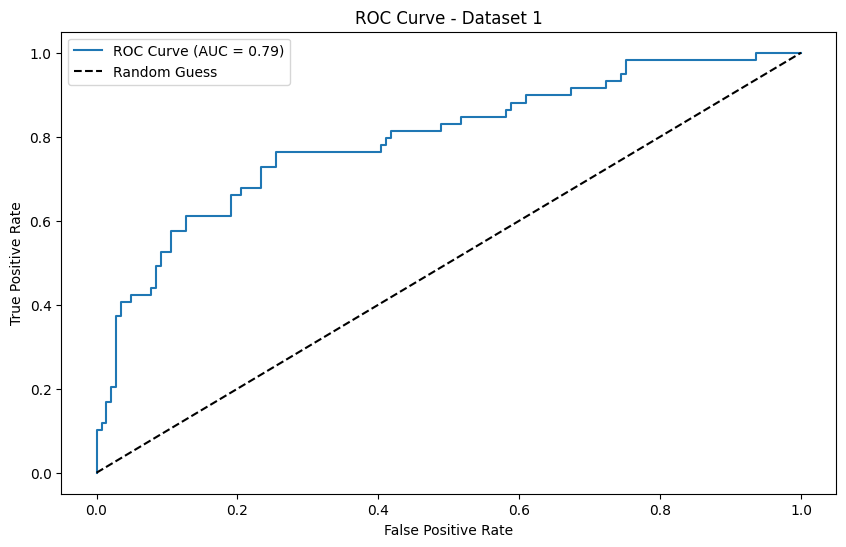


Proses Dataset 2
Metrik Evaluasi untuk Dataset 2:
Accuracy: 0.9514563106796117
Precision: 0.9619047619047619
Recall: 0.9439252336448598
F1 Score: 0.9528301886792453
AUC: 0.9876333427735298


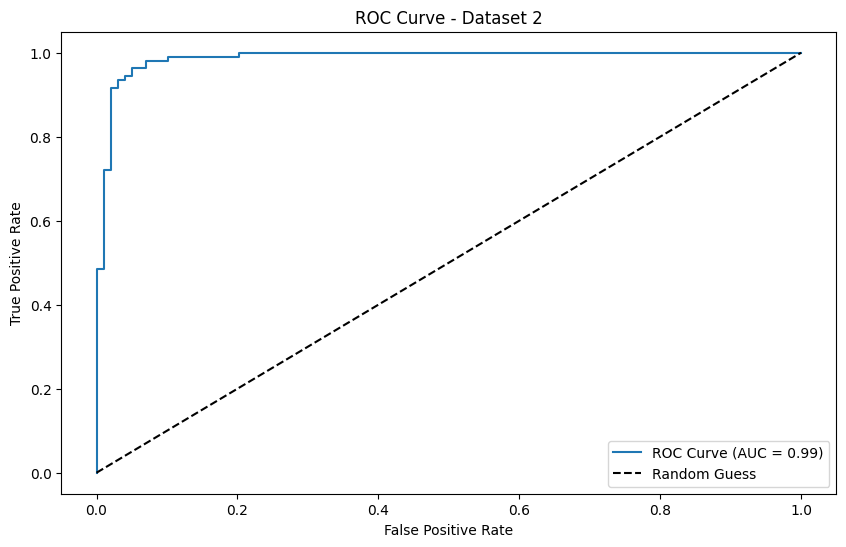

In [7]:
# Import library yang diperlukan
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi training dan testing
from sklearn.svm import SVC  # Untuk model Support Vector Classification
from sklearn.preprocessing import StandardScaler  # Untuk standarisasi fitur
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve)  # Untuk evaluasi klasifikasi
import matplotlib.pyplot as plt  # Untuk visualisasi
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize

# Load Dataset 1
file_path1 = '/content/drive/MyDrive/Dataset/CreditDataset.csv'
data1 = pd.read_csv(file_path1)

# Load Dataset 2
file_path2 = '/content/drive/MyDrive/Dataset/MaterialStrength.csv'
data2 = pd.read_csv(file_path2)

# ----------------- Dataset 1 ----------------- #
print("Proses Dataset 1")
# Pisahkan fitur dan target untuk Dataset 1
X1 = data1.drop('Class', axis=1)
y1 = data1['Class']

# Identifikasi kolom kategori untuk Dataset 1
categorical_columns1 = X1.select_dtypes(include=['object']).columns

# OneHotEncoding untuk Dataset 1
encoder1 = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical1 = encoder1.fit_transform(X1[categorical_columns1])
encoded_categorical_df1 = pd.DataFrame(encoded_categorical1, columns=encoder1.get_feature_names_out(categorical_columns1))

X1 = pd.concat([X1.drop(categorical_columns1, axis=1), encoded_categorical_df1], axis=1)

# Split data untuk Dataset 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standarisasi fitur untuk Dataset 1
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

# Model klasifikasi untuk Dataset 1
svc_model1 = SVC(kernel='linear', probability=True)
svc_model1.fit(X1_train_scaled, y1_train)
y1_pred_class = svc_model1.predict(X1_test_scaled)
y1_pred_prob = svc_model1.predict_proba(X1_test_scaled)[:, 1]

# Evaluasi klasifikasi untuk Dataset 1
accuracy1 = accuracy_score(y1_test, y1_pred_class)
precision1 = precision_score(y1_test, y1_pred_class, average='weighted')
recall1 = recall_score(y1_test, y1_pred_class, average='weighted')
f1_1 = f1_score(y1_test, y1_pred_class, average='weighted')

# Jika multikelas, gunakan OneHotEncoding untuk AUC
y1_test_encoded = label_binarize(y1_test, classes=np.unique(y1_test))

# Gunakan array 2D untuk roc_auc_score
auc1 = roc_auc_score(y1_test_encoded, svc_model1.decision_function(X1_test_scaled), multi_class='ovr')

print("Metrik Evaluasi untuk Dataset 1:")
print(f"Accuracy: {accuracy1}")
print(f"Precision: {precision1}")
print(f"Recall: {recall1}")
print(f"F1 Score: {f1_1}")
print(f"AUC: {auc1}")

# Konversi y1_test menjadi one-hot encoding
y1_test_encoded = label_binarize(y1_test, classes=np.unique(y1_test))
n_classes = y1_test_encoded.shape[1]

# ROC Curve untuk kasus biner
fpr, tpr, _ = roc_curve(y1_test_encoded.ravel(), svc_model1.decision_function(X1_test_scaled).ravel())
auc = roc_auc_score(y1_test_encoded, svc_model1.decision_function(X1_test_scaled))

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Dataset 1")
plt.legend(loc="best")
plt.show()



# ----------------- Dataset 2 ----------------- #
print("\nProses Dataset 2")
# Pisahkan fitur dan target untuk Dataset 2
X2 = data2.drop('target_feature', axis=1)
y2 = data2['target_feature']

# Identifikasi kolom kategori untuk Dataset 2
categorical_columns2 = X2.select_dtypes(include=['object']).columns

# OneHotEncoding untuk Dataset 2
encoder2 = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical2 = encoder2.fit_transform(X2[categorical_columns2])
encoded_categorical_df2 = pd.DataFrame(encoded_categorical2, columns=encoder2.get_feature_names_out(categorical_columns2))

X2 = pd.concat([X2.drop(categorical_columns2, axis=1), encoded_categorical_df2], axis=1)

# Split data untuk Dataset 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Standarisasi fitur untuk Dataset 2
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

# Konversi target kontinu menjadi kategori
median_target = y2_train.median()  # Menghitung median
y2_train_class = (y2_train > median_target).astype(int)  # 1 jika lebih besar dari median, 0 jika tidak
y2_test_class = (y2_test > median_target).astype(int)  # Lakukan hal yang sama pada data test

# Model klasifikasi untuk Dataset 2
svc_model2 = SVC(kernel='linear', probability=True)
svc_model2.fit(X2_train_scaled, y2_train_class)
y2_pred_class = svc_model2.predict(X2_test_scaled)
y2_pred_prob = svc_model2.predict_proba(X2_test_scaled)[:, 1]

# Evaluasi klasifikasi untuk Dataset 2
accuracy2 = accuracy_score(y2_test_class, y2_pred_class)
precision2 = precision_score(y2_test_class, y2_pred_class)
recall2 = recall_score(y2_test_class, y2_pred_class)
f1_2 = f1_score(y2_test_class, y2_pred_class)
auc2 = roc_auc_score(y2_test_class, y2_pred_prob)

print("Metrik Evaluasi untuk Dataset 2:")
print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")
print(f"F1 Score: {f1_2}")
print(f"AUC: {auc2}")

# ROC Curve untuk Dataset 2
fpr2, tpr2, _ = roc_curve(y2_test_class, y2_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr2, tpr2, label=f"ROC Curve (AUC = {auc2:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Dataset 2")
plt.legend(loc="best")
plt.show()
